In [15]:
# Import the module
import arcadia_pycolor as apc

In [16]:
# Direct access to a specific color.
# __repr__ method allows for display of the color in the terminal.
apc.aegean

   aegean #5088C5

In [17]:
# Displaying a Palette.
apc.palettes.accent

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846
   aster   #7A77AB
   rose    #F898AE

In [18]:
# Displaying a Gradient.
apc.gradients.viridis

                     
   concord #341E60 0
   grape   #5A4596 0.23
   aegean  #5088C5 0.49
   lime    #97CD78 0.77
   yellow  #FFFF00 1

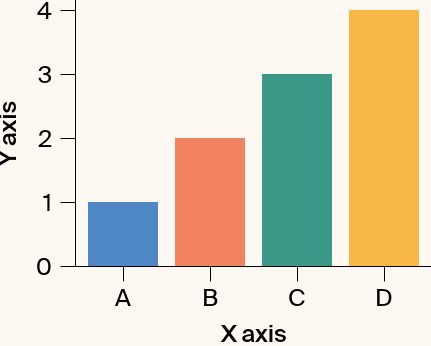

In [19]:
# Using colors in a matplotlib plot.
import matplotlib.pyplot as plt

plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=[apc.aegean, apc.amber, apc.seaweed, apc.canary],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

In [20]:
# Creating a Palette from a list of colors.
my_palette = apc.Palette("my_palette", [apc.aegean, apc.amber, apc.seaweed, apc.canary])

my_palette

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846

In [21]:
# Creating a Palette from a dictionary.
my_palette = apc.Palette.from_dict(
    "my_palette",
    {
        "red": "#FF0000",
        "green": "#00FF00",
        "blue": "#0000FF",
    },
)

my_palette

   red   #FF0000
   green #00FF00
   blue  #0000FF

In [22]:
# Creating a Gradient from a list of colors.
my_gradient = apc.Gradient("my_gradient", [apc.vitalblue, apc.oat, apc.amber])

my_gradient

                     
   vitalblue #73B5E3 0.0
   oat       #F5E4BE 0.5
   amber     #F28360 1.0

In [23]:
# Creating a Gradient from a list of colors while specifying values.
my_gradient = apc.Gradient(
    "my_gradient",
    [apc.concord, apc.vitalblue, apc.oat, apc.amber, apc.carmine],
    [0, 0.35, 0.5, 0.65, 1],
)

my_gradient

                     
   concord   #341E60 0
   vitalblue #73B5E3 0.35
   oat       #F5E4BE 0.5
   amber     #F28360 0.65
   carmine   #471122 1

In [24]:
# Creating a Gradient from a dictionary of colors.
my_gradient = apc.Gradient.from_dict(
    "my_gradient",
    {
        "red": "#FF0000",
        "grey": "#DDDDDD",
        "blue": "#0000FF",
    },
)

my_gradient

                     
   red  #FF0000 0.0
   grey #DDDDDD 0.5
   blue #0000FF 1.0

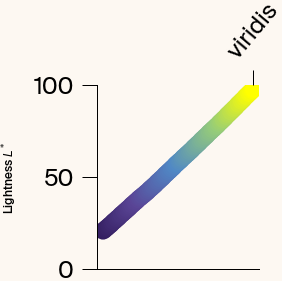

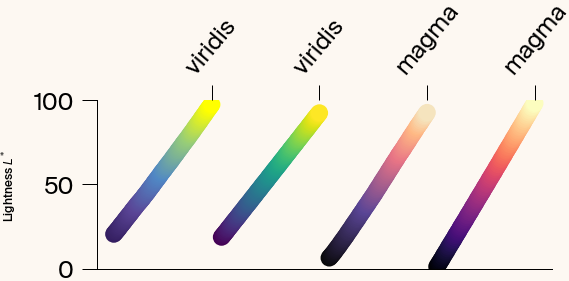

In [25]:
# Display the lightness of a Gradient.
apc.plot.plot_gradient_lightness(apc.gradients.viridis)
apc.plot.plot_gradient_lightness(
    [apc.gradients.viridis, "viridis", apc.gradients.magma, "magma"],
    figsize=(8, 4),
)

## Before `apc.mpl.setup()`

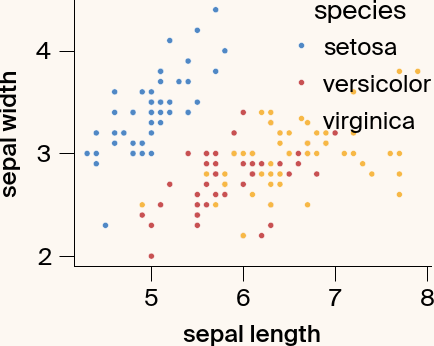

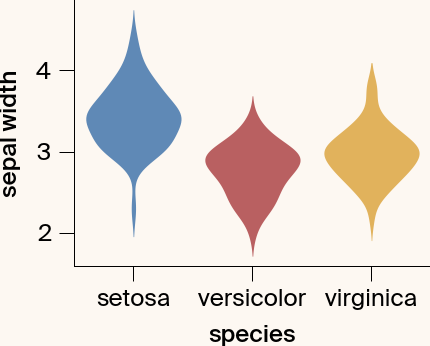

In [26]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

# prepare dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = [i.replace(" (cm)", "") for i in iris.feature_names]
iris_data["species"] = iris.target_names[iris.target]
iris_data.head(5)

# plot
x_data = "sepal length"
y_data = "sepal width"
c_data = "species"
colors = {"setosa": apc.aegean, "versicolor": apc.dragon, "virginica": apc.canary}

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, palette=colors)
plt.show()

sns.violinplot(x=c_data, y=y_data, data=iris_data, hue=c_data, palette=colors)
plt.show()

## After `apc.mpl.setup()`
- Updates `plt.rcParams` for all downstream plots
- Sets display background to off-white
- Updates fonts to use `Suisse Int'l` if they're available on your machine
- Adjusts padding, line width, and other elements
- Removes top and right spines

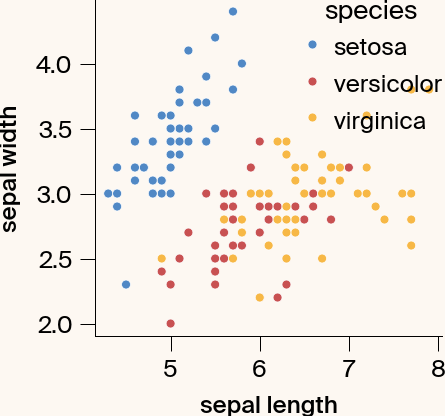

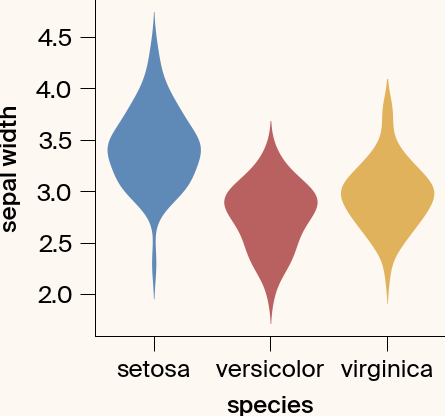

In [27]:
apc.mpl.setup()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=colors,
    ax=ax,
    s=80,
)
plt.savefig("examples/example1.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.

plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
plt.savefig("examples/example2.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.

plt.show()

## With `apc.mpl.autostyle()`
- Automatically capitalizes legend, axis titles
- Adds a horizontal line between legend title and entries
- Use `mono` parameter to set font to monospace
- Use `cat` parameter to set axis to categorical, which capitalizes text, removes tickmarks, and adjusts padding

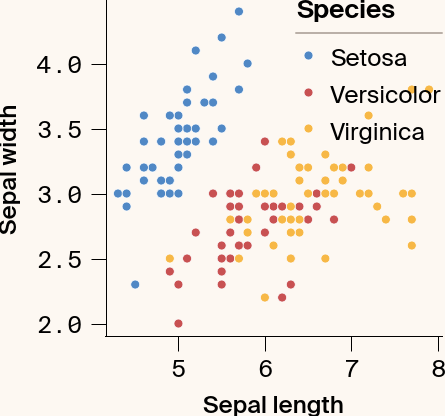

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


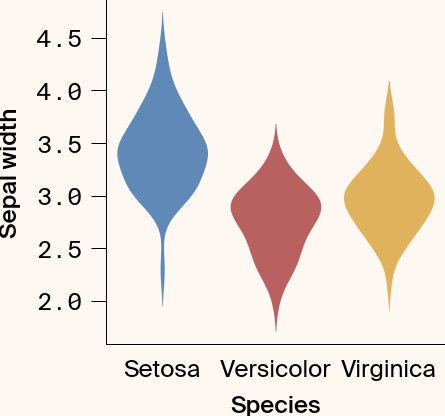

In [28]:
fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue="species",
    data=iris_data,
    palette=colors,
    ax=ax,
    s=80,
)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/example3.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.

plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.autostyle(cat="x", mono="y")
plt.savefig("examples/example4.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.

plt.show()